In [57]:
# Import Libraries

In [58]:
import os

# print the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)



Current working directory: D:\10 acadamy\solar-challenge-week1


In [4]:
# Import all necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

# Set working directory to project root
os.chdir(r"D:\10 acadamy\solar-challenge-week1")
print("Current working directory:", os.getcwd())







Current working directory: D:\10 acadamy\solar-challenge-week1


In [60]:
#load data 

In [5]:
import pandas as pd
import os

# Set working directory to project root
os.chdir(r"D:\10 acadamy\solar-challenge-week1")
print("Current working directory:", os.getcwd())

# Now you can load data directly
df = pd.read_csv("data/benin_raw.csv", low_memory=False)
df.head()

Current working directory: D:\10 acadamy\solar-challenge-week1


,Timestamp,Latitude,Longitude,GHI (W/m²),DNI (W/m²),DHI (W/m²),Temp (°C),RH (%),Pressure (hPa),Dew Point (°C),Wind Speed (m/s),Cloud Type,Solar Zenith Angle (°),Target_GHI_NextHour (W/m²)
0,1998-01-01 00:30:00,39.754943,-104.928739,341.581118,380.326236,72.649858,11.916165,35.728528,1010.482264,10.250311,3.278999,Clear,72.818352,383.384506
1,1998-01-01 01:00:00,39.832204,-105.039324,177.789175,300.146084,-34.446156,20.988743,98.138223,1009.356547,19.228097,3.180614,Cumulus,80.395158,654.211173
2,1998-01-01 01:30:00,39.880517,-104.736875,383.384506,349.160733,136.490584,25.183423,39.959014,1008.698430,21.821219,4.424296,Clear,30.029383,562.802620
3,1998-01-01 02:00:00,39.870209,-105.075542,654.211173,215.090519,502.119208,13.275915,67.850579,1011.101321,11.042622,2.273316,Overcast,69.173049,341.691203
4,1998-01-01 02:30:00,39.739962,-105.010037,562.802620,807.605770,-8.260897,16.168259,56.339117,1017.752069,13.354326,5.219018,Cumulus,73.775065,509.841850


In [62]:
#Summary stats & missing-value report

In [6]:
# numeric summary
display(df.describe())

# count nulls per column
nulls = df.isna().sum().sort_values(ascending=False)
display(nulls)

# list columns with >5% nulls
pct_null = (df.isna().mean() * 100).sort_values(ascending=False)
cols_gt5 = pct_null[pct_null > 5.0]
print("Columns with >5% missing:\n", cols_gt5)


,Latitude,Longitude,GHI (W/m²),DNI (W/m²),DHI (W/m²),Temp (°C),RH (%),Pressure (hPa),Dew Point (°C),Wind Speed (m/s),Solar Zenith Angle (°),Target_GHI_NextHour (W/m²)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.738618,-104.991007,399.800292,499.079481,46.897807,15.442090,60.389547,1013.093947,13.435881,3.021991,59.313633,399.556559
std,0.096731,0.103423,195.285252,241.866725,262.514732,10.107417,19.406046,4.851152,10.154980,0.947169,19.572755,195.501778
min,39.409927,-105.426016,2.024021,1.967628,-666.469797,-16.231378,10.000000,995.797548,-18.617796,0.103333,0.000000,2.024021
25%,39.674652,-105.059795,264.329681,318.485319,-123.715678,8.046440,47.297949,1009.827467,6.089159,2.366297,46.238528,263.609982
50%,39.737163,-104.989372,384.193053,502.035379,44.157132,15.644122,60.117442,1013.213632,13.840205,3.071902,60.363443,384.193053
75%,39.806505,-104.919821,534.448905,669.393632,221.367729,22.073962,73.582357,1016.462609,20.394635,3.674363,74.248145,534.448905
max,40.037782,-104.673744,1247.378508,1241.657814,872.902006,48.611715,100.000000,1026.483079,47.188422,6.075170,90.000000,1247.378508


Timestamp                     0
Latitude                      0
Longitude                     0
GHI (W/m²)                    0
DNI (W/m²)                    0
DHI (W/m²)                    0
Temp (°C)                     0
RH (%)                        0
Pressure (hPa)                0
Dew Point (°C)                0
Wind Speed (m/s)              0
Cloud Type                    0
Solar Zenith Angle (°)        0
Target_GHI_NextHour (W/m²)    0
dtype: int64

Columns with >5% missing:
 Series([], dtype: float64)


In [64]:
#Outlier detection (Z-score) & flagging

In [7]:
cols_to_z = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
# keep only columns that exist
cols_to_z = [c for c in cols_to_z if c in df.columns]

# compute z-scores (ignoring NaNs)
z = np.abs(stats.zscore(df[cols_to_z].dropna()))
# z has shape (n_non_na_rows, n_cols); easier: compute per-column
z_df = df[cols_to_z].apply(lambda x: (x - x.mean())/x.std(ddof=0))

# flag rows where any |Z| > 3
outlier_mask = (np.abs(z_df) > 3).any(axis=1)
df['outlier_flag'] = outlier_mask
print("Outliers found:", df['outlier_flag'].sum())


Outliers found: 0


In [66]:
#Drop or impute missing values

In [8]:
key_cols = [c for c in ['GHI','DNI','DHI','ModA','ModB','WS','WSgust','Tamb','RH'] if c in df.columns]

# show how many nulls remain
print(df[key_cols].isna().sum())

# median impute:
for c in key_cols:
    if df[c].isna().sum() > 0:
        median = df[c].median()
        df[c] = df[c].fillna(median)


Series([], dtype: float64)


In [70]:
#Time-series analysis & plots

In [10]:
df = df.rename(columns={
    'Global_Horizontal_Irradiance': 'GHI',
    'Direct_Normal_Irradiance': 'DNI',
    'Diffuse_Horizontal_Irradiance': 'DHI',
    'Temperature': 'Tamb'
})


In [72]:
#Cleaning impact (pre/post)

In [11]:
df = df.rename(columns={
    'GHI (W/m²)': 'GHI',
    'DNI (W/m²)': 'DNI',
    'DHI (W/m²)': 'DHI',
    'Temp (°C)': 'Tamb',
    'RH (%)': 'RH',              # add this line for Relative Humidity
    'Pressure (hPa)': 'BP',      # optional, if you want to use Pressure in bubble chart
    'Wind Speed (m/s)': 'WS',    # optional, if you want WS plots
    # add any other columns you want to simplify names
})



In [74]:
df.columns.tolist()


['Timestamp',
 'Latitude',
 'Longitude',
 'GHI',
 'DNI',
 'DHI',
 'Tamb',
 'RH',
 'BP',
 'Dew Point (°C)',
 'WS',
 'Cloud Type',
 'Solar Zenith Angle (°)',
 'Target_GHI_NextHour (W/m²)',
 'outlier_flag']

In [75]:
#Correlation & scatter plots

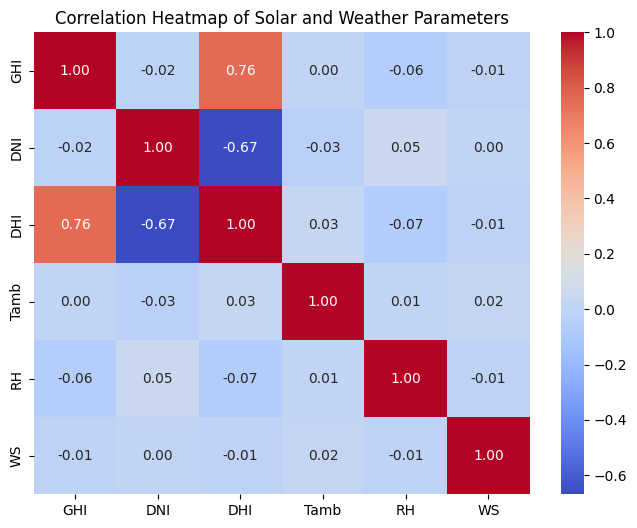

In [12]:
# 6. Correlation heatmap
# -------------------------
corr_cols = [c for c in ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS'] if c in df.columns]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Solar and Weather Parameters")
plt.show()


In [77]:
#Wind & distribution analysis

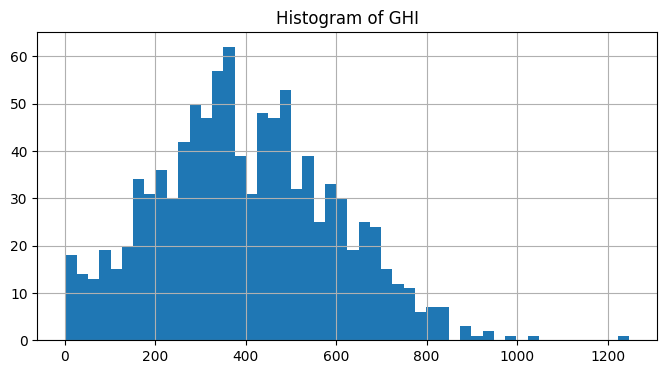

In [13]:
if 'WD' in df.columns and 'WS' in df.columns:
    ax = WindroseAxes.from_ax()
    ax.bar(df['WD'].fillna(0), df['WS'].fillna(0), normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title("Wind rose")
    plt.show()

# histogram for GHI
plt.figure(figsize=(8,4))
df['GHI'].hist(bins=50)
plt.title("Histogram of GHI")
plt.show()


In [79]:
#Temperature & humidity relationships

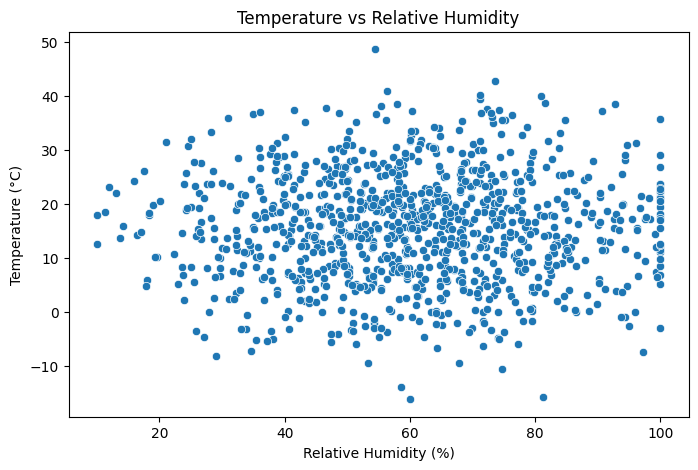

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='RH', y='Tamb', data=df.sample(n=2000) if len(df)>2000 else df)
plt.title("Temperature vs Relative Humidity")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()


In [81]:
#Bubble chart

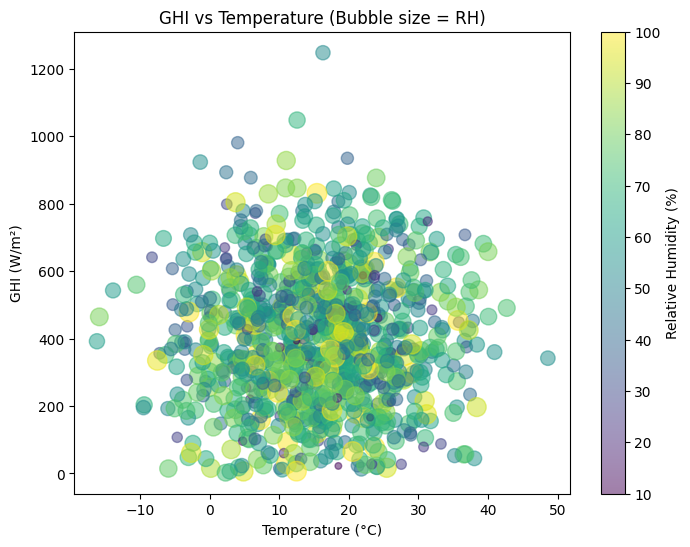

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(
    df['Tamb'], 
    df['GHI'], 
    s=df['RH']*2,   # scale bubble size for visibility
    c=df['RH'],     # color by RH too
    alpha=0.5, 
    cmap='viridis'
)
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel("Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature (Bubble size = RH)")
plt.show()


In [ ]:
# Save cleaned 

In [16]:
import os

# Make sure data folder exists
os.makedirs("data", exist_ok=True)

# Save to data folder in project root
clean_path = "data/benin_clean.csv"
df.to_csv(clean_path, index=False)
print("✅ Saved cleaned CSV to", clean_path)
os.makedirs("data", exist_ok=True)



✅ Saved cleaned CSV to data/benin_clean.csv
